#**Import the Libraries**

In [1]:
#Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


import re
import nltk
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from textblob import TextBlob


import warnings
warnings.filterwarnings('ignore')

#**Load the Data**

In [2]:
#Load the dataset
df=pd.read_csv("/content/flipkart_product.csv", encoding='unicode_escape')
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


#**Exploratory Data Analysis**

In [3]:
#Create a new column word_count with the count of summary
df['word_count']=df.Summary.str.len()
df

,ProductName,Price,Rate,Review,Summary,word_count
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,106.0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,38.0
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,50.0
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,34.0
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,13.0
...,...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks,6.0
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good,4.0
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super,5.0
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good,4.0


In [4]:
#Filter the DataFrame 'df'for each unique rating
df=df[(df['Rate'] == '5') | (df['Rate'] == '4') | (df['Rate'] == '3') | (df['Rate'] == '2') | (df['Rate'] == '1') ]

df['Rate'].value_counts()

5    108694
4     39653
1     19607
3     15681
2      6234
Name: Rate, dtype: int64

In [5]:
#The 'preprocess' function removes non-alphanumeric characters and reduces multiple spaces to a single space in the input 'row'.
def preprocess(row):
    row=re.sub('[^a-zA-Z0-9]', ' ', row)
    row= re.sub('\s+', ' ', row)
    return row


In [6]:
#Display the data types of the columns
df.dtypes

ProductName     object
Price           object
Rate            object
Review          object
Summary         object
word_count     float64
dtype: object

In [7]:
#Applying 'preprocess' function to 'Summary', 'ProductName', and 'Price' columns, handling non-string values
df['Summary'] = df['Summary'].apply(lambda x: preprocess(x) if isinstance(x, str) else x)
df['ProductName']=df['ProductName'].apply(lambda x: preprocess(x) if isinstance(x, str) else x)
df['Price']=df['Price'].apply(lambda x: preprocess(x) if isinstance(x, str) else x)
df

,ProductName,Price,Rate,Review,Summary,word_count
0,Candes 12 L Room Personal Air Cooler White Bla...,3 999,5,Super!,Great cooler excellent air flow and for this p...,106.0
1,Candes 12 L Room Personal Air Cooler White Bla...,3 999,5,Awesome,Best budget 2 fit cooler Nice cooling,38.0
2,Candes 12 L Room Personal Air Cooler White Bla...,3 999,3,Fair,The quality is good but the power of air is de...,50.0
3,Candes 12 L Room Personal Air Cooler White Bla...,3 999,1,Useless product,Very bad product it s a only a fan,34.0
4,Candes 12 L Room Personal Air Cooler White Bla...,3 999,3,Fair,Ok ok product,13.0
...,...,...,...,...,...,...
189868,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Good,4.0
189869,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Thanks,6.0
189870,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Good,4.0
189871,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Just wow!,Super,5.0


In [8]:
#Mapping sentiment labels 'positive' and 'negative' based on 'Rate' values in the DataFrame
sentiment_map={'5':'positive','4':'positive','2':'negative','1':'negative', '3':'positive'}
df['label']=df['Rate'].map(sentiment_map)
df

,ProductName,Price,Rate,Review,Summary,word_count,label
0,Candes 12 L Room Personal Air Cooler White Bla...,3 999,5,Super!,Great cooler excellent air flow and for this p...,106.0,positive
1,Candes 12 L Room Personal Air Cooler White Bla...,3 999,5,Awesome,Best budget 2 fit cooler Nice cooling,38.0,positive
2,Candes 12 L Room Personal Air Cooler White Bla...,3 999,3,Fair,The quality is good but the power of air is de...,50.0,positive
3,Candes 12 L Room Personal Air Cooler White Bla...,3 999,1,Useless product,Very bad product it s a only a fan,34.0,negative
4,Candes 12 L Room Personal Air Cooler White Bla...,3 999,3,Fair,Ok ok product,13.0,positive
...,...,...,...,...,...,...,...
189868,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Good,4.0,positive
189869,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Thanks,6.0,positive
189870,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Terrific,Good,4.0,positive
189871,NIVEA Soft Light Moisturizer for Face Hand Bod...,142,5,Just wow!,Super,5.0,positive


<Axes: xlabel='label', ylabel='count'>

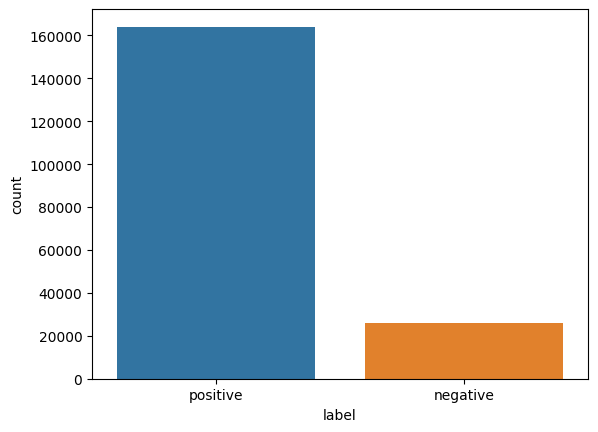

In [9]:
sns.countplot(df, x='label')

#**Plot word cloud to understand important words in each classes**

In [10]:
#Creating DataFrames 'bad_reviews' and 'good_reviews' by filtering negative and positive sentiment reviews, respectively.
bad_reviews = df[df['label']=='negative']
good_reviews=df[df['label']=='positive']

In [11]:
# Preprocess 'Summary' column to handle NaN values (fill with empty string)
good_reviews['Summary'] = good_reviews['Summary'].fillna('')  # Fill NaN with empty string
bad_reviews['Summary'] = bad_reviews['Summary'].fillna('')    # Fill NaN with empty string

In [12]:
#Concatenating text from 'Summary' column for positive and negative sentiment reviews, respectively
good_reviews_text=' '.join (good_reviews['Summary'].to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews['Summary'].to_numpy().tolist())

In [13]:
#The function 'gen_wc' generates and displays a Word Cloud for the input text, using specified parameters
def gen_wc(txt):
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300, stopwords = stopwords).generate(txt)
    plt.figure(figsize=(14,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

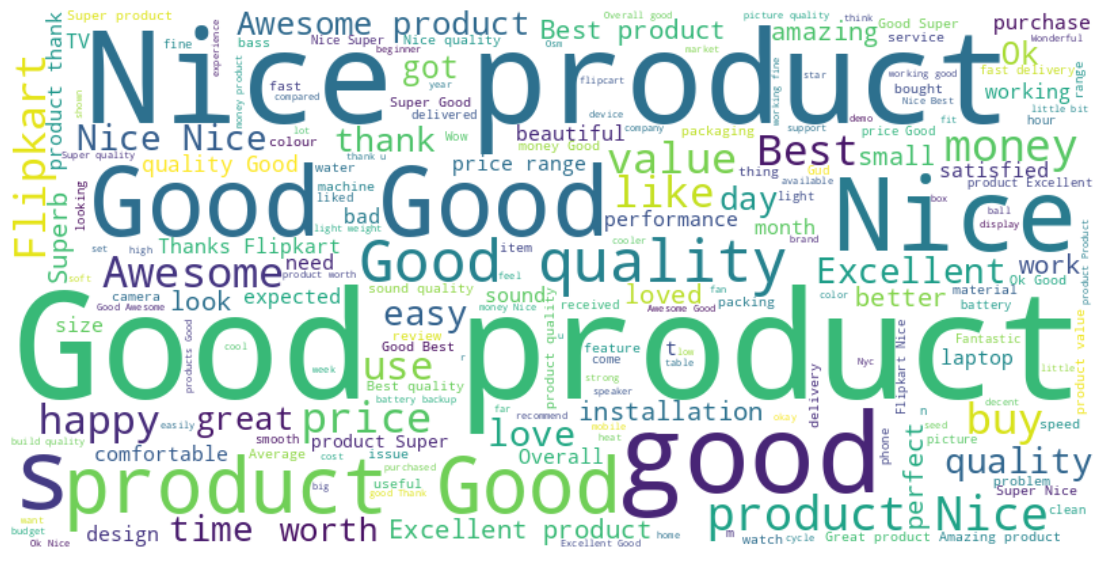

In [14]:
#Generates and displays a Word Cloud for the text of positive sentiment reviews
gen_wc(good_reviews_text)

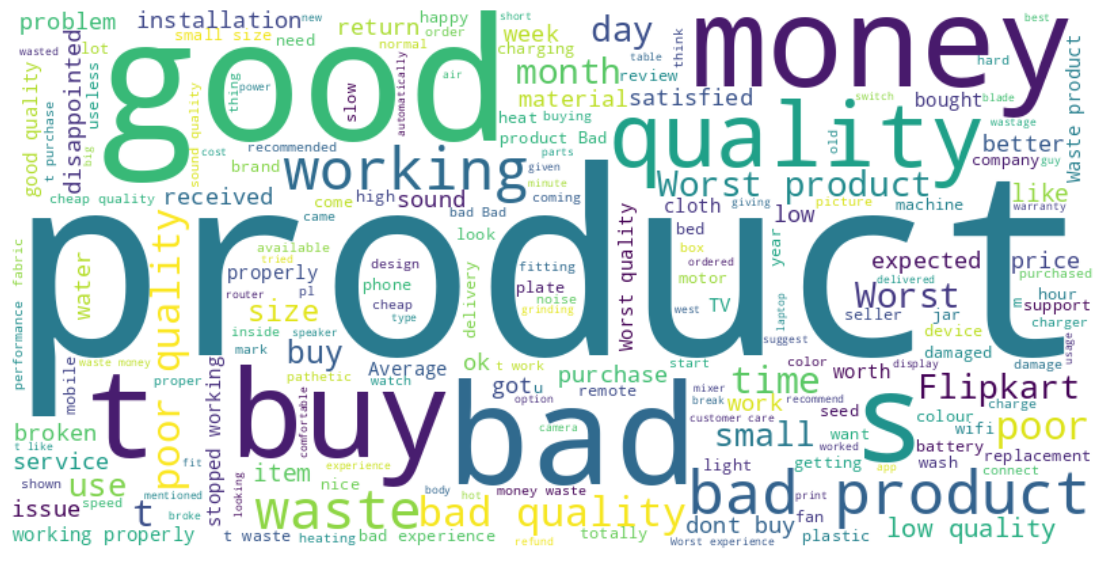

In [15]:
#Generates and displays a Word Cloud for the text of negative sentiment reviews
gen_wc(bad_reviews_text)

In [16]:

label_enc=LabelEncoder()
df['label']=label_enc.fit_transform(df['label'])

In [17]:
# Separate the feature (input) and label (output) data
X = df['Summary']  # Assuming 'Summary' contains the input features
y = df['label']    # Assuming 'label' contains the corresponding output labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#**Embedding the Data**

In [18]:
# Fill NaN values in the 'Summary' column with an empty string
df['Summary'] = df['Summary'].fillna('')

# Create the TfidfVectorizer and fit on the 'Summary' column
tfidf = TfidfVectorizer()
tfidf.fit(df['Summary'])

# Fill NaN values in 'x_train' and 'x_test' with an empty string
x_train = x_train.fillna('')
x_test = x_test.fillna('')

# Transform the training and testing data
tf_x_train = tfidf.transform(x_train)
tf_x_test = tfidf.transform(x_test)

In [19]:
cnvec=CountVectorizer()
cnvec.fit(df['Summary'])

cn_x_train=cnvec.transform(x_train)
cn_x_test=cnvec.transform(x_test)

#**Build pipeline**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import clone
def model(clf, x_train_tf, x_test_tf, y_train, y_test, x_train_cv, x_test_cv):
    clf1=clone(clf)
    clf.fit(x_train_tf, y_train)
    y_pred_tf=clf.predict(x_test_tf)
    print(f"The classification report for {clf} for tfidf embedding is \n\n {classification_report(y_test,y_pred_tf)}")
    print (f"The confusion matrix for {clf} model for tfidf embedding is \n\n {confusion_matrix(y_test, y_pred_tf)} \n\n ")

    clf1.fit(x_train_cv, y_train)
    y_pred_cv=clf1.predict(x_test_cv)
    print(f"Classification report for {clf} model for Count Vect is \n\n {classification_report(y_test,y_pred_cv)}")
    print (f"Confusion matrix for {clf} model for Count Vec is \n\n {confusion_matrix(y_test, y_pred_cv)}")

#**Naive Bayes Model**

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model(mnb,tf_x_train, tf_x_test, y_train, y_test, cn_x_train, cn_x_test)

The classification report for MultinomialNB() for tfidf embedding is 

               precision    recall  f1-score   support

           0       0.88      0.42      0.57      6414
           1       0.92      0.99      0.95     41054

    accuracy                           0.91     47468
   macro avg       0.90      0.71      0.76     47468
weighted avg       0.91      0.91      0.90     47468

The confusion matrix for MultinomialNB() model for tfidf embedding is 

 [[ 2696  3718]
 [  361 40693]] 

 
Classification report for MultinomialNB() model for Count Vect is 

               precision    recall  f1-score   support

           0       0.81      0.71      0.76      6414
           1       0.96      0.97      0.96     41054

    accuracy                           0.94     47468
   macro avg       0.88      0.84      0.86     47468
weighted avg       0.94      0.94      0.94     47468

Confusion matrix for MultinomialNB() model for Count Vec is 

 [[ 4554  1860]
 [ 1054 40000]]


#**Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
sv=SVC()
model(sv,tf_x_train, tf_x_test, y_train, y_test, cn_x_train, cn_x_test)

# **XG Boost Model**

In [23]:
import xgboost as xgb
xg=xgb.XGBClassifier(max_depth=5, n_estimators=150)
model(xg,tf_x_train, tf_x_test, y_train, y_test, cn_x_train, cn_x_test)

The classification report for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) for tfidf embedding is 

               precision    recall  f1-score   support

           0       0.86      0.79      0.83      6414
           1       0.97      0.98      0.97     41054

    accuracy                   